In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

In [25]:
img = cv2.imread('NASA’s_James_Webb_Space_Telescopel.jpeg')

In [26]:
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

### SOBEL

In [15]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [16]:
kernel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
kernel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

In [17]:
sobel_x = cv2.filter2D(gray, -1, kernel_x)
sobel_y = cv2.filter2D(gray, -1, kernel_y)
sobel = sobel_x + sobel_y

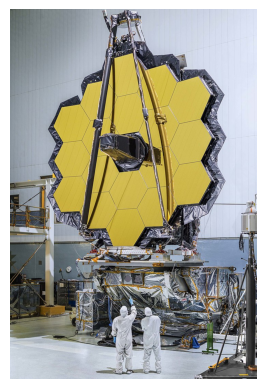

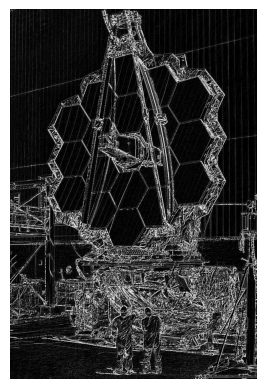

In [18]:
plt.axis('off')
plt.imshow(img_RGB)
plt.show()

plt.axis('off')
plt.imshow(sobel, cmap='gray')
plt.show()

### CANNY

In [27]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [30]:
canny = cv2.Canny(gray, 50, 150)

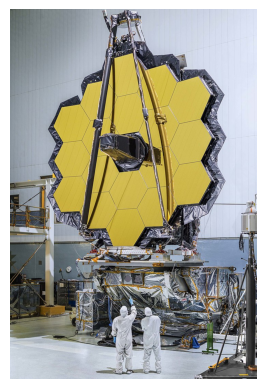

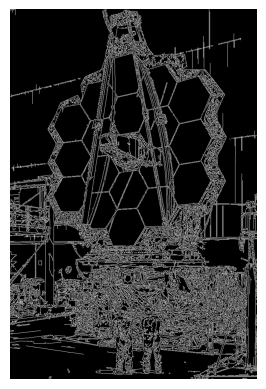

In [31]:
plt.axis('off')
plt.imshow(img_RGB)
plt.show()

plt.axis('off')
plt.imshow(canny, cmap='gray')
plt.show()

### Roberts

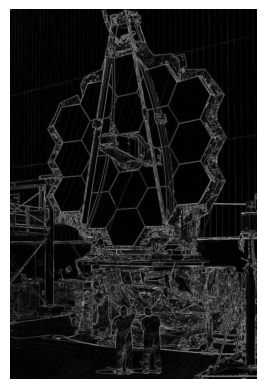

In [22]:
roberts_cross_v = np.array( [[1, 0 ],
                             [0,-1 ]] )
  
roberts_cross_h = np.array( [[ 0, 1 ],
                             [ -1, 0 ]] )
  
img = cv2.imread('NASA’s_James_Webb_Space_Telescopel.jpeg',0).astype('float64')
img/=255.0
vertical = ndimage.convolve( img, roberts_cross_v )
horizontal = ndimage.convolve( img, roberts_cross_h )
  
edged_img = np.sqrt( np.square(horizontal) + np.square(vertical))
edged_img*=255
cv2.imwrite("output.jpg",edged_img)

plt.axis('off')
plt.imshow(edged_img, cmap='gray')
plt.show()


# Висновок
Для даного зображення кращим з трьох фільтрів виявився фільтр Робертса (можна розрізнити контури людей, а не тільки контури дзеркала телескоба Джеймса Вебба), оскільки він може ідентифікувати діагональні градієнти. Canny та Sobel для даного зображення виявивилися менш придатними (забагато шуму в нижній частині зображення).